In [70]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import classification_report
plt.style.use('ggplot')
%matplotlib inline

# About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [38]:
dataset=pd.read_csv("mushrooms.csv")
dataset.head()
dataset.shape

(8124, 23)

<AxesSubplot:xlabel='class', ylabel='count'>

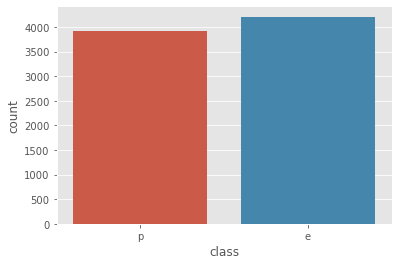

In [3]:
sns.countplot(x ='class', data = dataset)

In [4]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
dataset.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:xlabel='habitat', ylabel='count'>

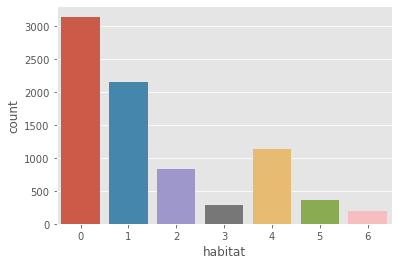

In [10]:
sns.countplot(x ='habitat', data = X)

In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_test)
print(y_test)

      cap-shape_1  cap-shape_2  cap-shape_3  cap-shape_4  cap-shape_5  \
1971            0            1            0            0            0   
6654            0            1            0            0            0   
5606            0            0            0            0            1   
3332            0            1            0            0            0   
6988            0            1            0            0            0   
...           ...          ...          ...          ...          ...   
462             0            0            0            0            0   
1956            0            0            0            0            1   
3781            0            0            0            0            1   
799             0            0            0            0            1   
2402            0            0            0            0            1   

      cap-surface_1  cap-surface_2  cap-surface_3  cap-color_1  cap-color_2  \
1971              0              0          

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

numpy.ndarray

In [17]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [18]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    
    if train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(random_state=42)

In [20]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9085

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1257
           1       0.97      0.83      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1231   26]
 [ 197  984]]



In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
predicted_df = pd.DataFrame(classifier.predict(X_test))
predicted_df = predicted_df.replace(1,"poisonous")
predicted_df = predicted_df.replace(0,"edible")
predicted_df

,0
0,edible
1,poisonous
2,poisonous
3,edible
4,poisonous
...,...
2433,edible
2434,edible
2435,poisonous
2436,edible


In [22]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9307

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1211   46]
 [ 123 1058]]



In [23]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [24]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8966

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1215   42]
 [ 210  971]]



In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [26]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9299

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.89      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1211   46]
 [ 125 1056]]



In [57]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_dim=2, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [58]:
model_1.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 33,345
Trainable params: 33,345
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [60]:
history_1=model_1.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
356/356 [==============================] - 0s 756us/step - loss: 0.2590 - accuracy: 0.9045
Epoch 2/10
356/356 [==============================] - 0s 885us/step - loss: 0.1911 - accuracy: 0.9231
Epoch 3/10
356/356 [==============================] - 0s 781us/step - loss: 0.1798 - accuracy: 0.9289
Epoch 4/10
356/356 [==============================] - 0s 818us/step - loss: 0.1758 - accuracy: 0.9289
Epoch 5/10
356/356 [==============================] - 0s 764us/step - loss: 0.1737 - accuracy: 0.9311
Epoch 6/10
356/356 [==============================] - 0s 770us/step - loss: 0.1721 - accuracy: 0.9295
Epoch 7/10
356/356 [==============================] - 0s 770us/step - loss: 0.1700 - accuracy: 0.9314
Epoch 8/10
356/356 [==============================] - 0s 767us/step - loss: 0.1682 - accuracy: 0.9300
Epoch 9/10
356/356 [==============================] - 0s 784us/step - loss: 0.1683 - accuracy: 0.9295
Epoch 10/10
356/356 [==============================] - 0s 773us/step - loss: 0.167

In [64]:
model_1.evaluate(X_test,y_test)


77/77 [==============================] - 0s 454us/step - loss: 0.1778 - accuracy: 0.9286


[0.17777569591999054, 0.9286300539970398]

In [69]:
cnn_pred=model_1.predict(X_test)
cnn_pred=cnn_pred.round()
cnn_pred

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [72]:
 print(classification_report(y_test, cnn_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1257
           1       0.98      0.87      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



In [77]:
model = model_1.predict(X_test)
model = model.round()
predicted_df = pd.DataFrame(model)
predicted_df = predicted_df.replace(1,"poisonous")
predicted_df = predicted_df.replace(0,"edible")
predicted_df

,0
0,edible
1,poisonous
2,poisonous
3,edible
4,poisonous
...,...
2433,edible
2434,edible
2435,poisonous
2436,edible
